
Alunos:
  * Arthur Breno dos Reis Paula - 12547382
  * Fernando - 8556609
  * Mateus Israel Silva - 11735042

# Desafio: **Porto Seguro's Safe Driver Prediction**

OBJETIVO:
 - Calcular a probabilidade de um seguro automotivo ser acionado

# Biliotecas importadas

In [90]:
## Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imputção de dados
from sklearn.impute import KNNImputer

## Decomposição
from sklearn.decomposition import PCA

## Pre processamento
from sklearn.preprocessing import StandardScaler

Configuração gráfica

In [91]:
%matplotlib inline

In [92]:
sns.set_style('darkgrid')

Importação dos dados

In [93]:
path_train = '/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_porto_seguro_driver/train.csv'
path_test = '/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_porto_seguro_driver/test.csv'

In [94]:
dados_brutos = pd.read_csv(path_train)
dados_brutos_teste = pd.read_csv(path_test)

---

# Técnicas de sampling: imbalanced-learn (imblearn)

In [1]:
from imblearn.under_sampling import NearMiss

In [37]:
sampler = NearMiss(n_jobs=-1)

In [38]:
X_res, y_res = sampler.fit_resample(X, y)

In [39]:
print('Tamanho do conjunto das variáveis após reamostragem', X_res.shape)
print('Tamanho do conjunto do target após reamostragem', y_res.shape)

Tamanho do conjunto das variáveis após reamostragem (38300, 54)
Tamanho do conjunto do target após reamostragem (38300,)


In [40]:
print('Parametros escolhidos pelo modelo SMOTEENN para balanceamento do conjunto')
sampler.get_params()

Parametros escolhidos pelo modelo SMOTEENN para balanceamento do conjunto


{'n_jobs': -1,
 'n_neighbors': 3,
 'n_neighbors_ver3': 3,
 'sampling_strategy': 'auto',
 'version': 1}

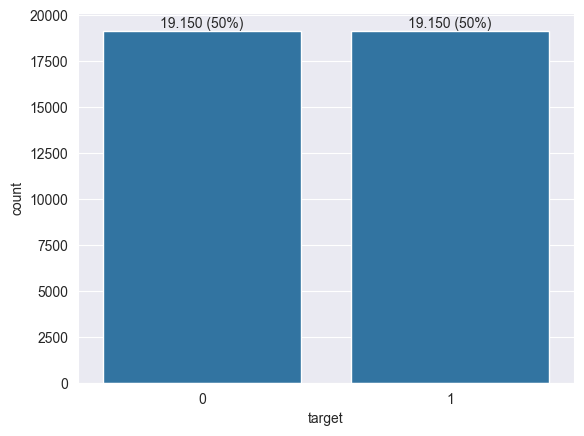

In [41]:
y_res = pd.DataFrame(y_res)
ax = sns.countplot(y_res, x='target')

abs_values = y_res['target'].value_counts(ascending=False)
rel_values = y_res['target'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]:,} ({p[1]:.0f}%)'.replace(',', '.') for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.show()
